### AAYUSH GOYAL
### EE18BTECH11001
### Assignment 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroML.correlation import bootstrap_two_point_angular
import csv

In [2]:
data = np.genfromtxt("BCS05hr.txt")
data = data[data[:,2]<20]
data = data[data[:,2]>17]
data = data[data[:,3]>0.002]

In [3]:
def twopoint_cor(N):
    LIN = np.linspace(np.log10(1. / 60.), np.log10(6), 16)
    bins = 10 ** LIN
    results = [bins]
    for D in [data]:
        results += bootstrap_two_point_angular(D[:,0],D[:,1],
                                               bins=bins,method='landy-szalay',Nbootstraps=N)
    return results

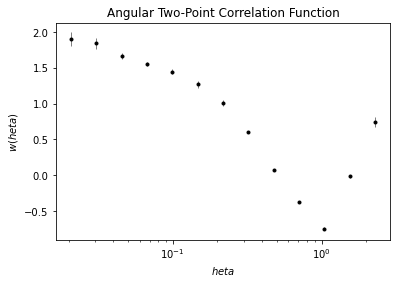

In [4]:
(bins, corr, cor_er, bstraps) = twopoint_cor(10)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.errorbar(bin_centers, corr, cor_er,fmt='.k', ecolor='gray', lw=1)
plt.xscale('log')
plt.yscale('linear')
plt.xlabel('$\theta$')
plt.ylabel('$w(\theta)$')
plt.title('Angular Two-Point Correlation Function')
plt.show()